# Akcje
- wypłaszczyć dane, uogólnić 'test_setup_exception', 'test_exception', 'test_teardown_exception' do jednego pola, i po tym polu filtrować/podsumowywać

In [17]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pandas import json_normalize
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [18]:
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

## Helper functions

In [195]:
def plot_runs_by_exception_types(df):
#     df_na.groupby(['test_setup_exception', 'test_exception', 'test_teardown_exception']).count()['result'].plot(kind='barh', x=['test_setup_exception', 'test_exception', 'test_teardown_exception'])
    def adding_exception_type(x):
        if x.test_setup_exception:
            return 'test_setup_exception'
        elif x.test_exception:
            return 'test_exception'
        elif x.test_teardown_exception:
            return 'test_teardown_exception'
        else:
            return None
        
    df_temp = df.groupby(['test_setup_exception', 'test_exception', 'test_teardown_exception']).count()['result'].reset_index()


    df_temp['exception_type'] = df_temp.apply(adding_exception_type, axis=1)
    df_temp['exception'] = df_temp.apply(lambda value: value[value.exception_type], axis=1)
    df_temp.drop(['test_setup_exception', 'test_exception', 'test_teardown_exception'], axis=1, inplace=True)
    colors = {'test_setup_exception': 'r', 'test_exception': 'b', 'test_teardown_exception': 'g'}
    df_temp.set_index('exception')['result'].plot.barh(title="Exception occurrence", figsize=(10, 6), legend=True, color=[colors[i] for i in df_temp['exception_type']])
    patches = [mpatches.Patch(color=colors[x], label=x) for x in colors.keys()]
    plt.legend(handles=patches, labels=colors.keys())

In [19]:
# url = 'http://rep-portal.wroclaw.nsn-rdnet.net/api/automatic-test/runs/report/powerbi.1633096233653.json?limit=1000&builds__name__pos_neg=SBTS00&ordering=-start&qc_test_instance__test_set__name__pos_neg=2175-RB%2C%202175-QB%2C%201085-A%2C%201085-B%2C%201085-C%2C%207883&qc_test_instance__test_object__pos_neg=Regression&test_case__name__name__pos_neg=2175-RB%2C%202175-QB%2C%201085%2C%207883&offset=0&fields=no,qc_test_set,test_case__name,hyperlink_set__test_logs_url,test_col__name,test_suite,start,end,result,env_issue_type,test_line,test_col__testline_type,builds,test_col__ute_version,test_col__robotlte_revision,qc_test_instance__organization,qc_test_instance__test_object,qc_test_instance__feature,test_setup_exception,test_setup_exception_message,test_exception,test_exception_message,test_teardown_exception,test_teardown_exception_message&powerBIToken=fbe23d8dc34fb99d08fd12de71b5ab0c6fd90afb'
# url_test_result = 'http://rep-portal.wroclaw.nsn-rdnet.net/api/automatic-test/runs/report/powerbi.1633096267418.json?limit=50&builds__name__pos_neg=SBTS00&ordering=-start&qc_test_instance__test_set__name__pos_neg=2175-RB%2C%202175-QB%2C%201085-A%2C%201085-B%2C%201085-C%2C%207883&qc_test_instance__test_object__pos_neg=Regression&test_case__name__name__pos_neg=2175-RB%2C%202175-QB%2C%201085%2C%207883&offset=0&result__name__pos_neg=not%20analyzed&fields=no,qc_test_set,test_case__name,hyperlink_set__test_logs_url,test_col__name,test_suite,start,end,result,env_issue_type,test_line,test_col__testline_type,builds,test_col__ute_version,test_col__robotlte_revision,qc_test_instance__organization,qc_test_instance__test_object,qc_test_instance__feature,test_setup_exception,test_setup_exception_message,test_exception,test_exception_message,test_teardown_exception,test_teardown_exception_message&powerBIToken=fbe23d8dc34fb99d08fd12de71b5ab0c6fd90afb'
# response = requests.get(url)
# dictr = response.json()
# recs = dictr['results']
# df = json_normalize(recs)
# # print(df)

In [20]:
with open("data.json") as json_file:
    records = json.load(json_file)['results']
    df = json_normalize(records)

In [21]:
@interact
def show_articles_more_than(column='result', x=['not analyzed', 'passed']):
    return df.loc[df[column] == x]

In [30]:
df_na = df[df['result'] == 'not analyzed']

# df_na.groupby(['test_exception']).count()
# df_na.groupby([df_na.index, 'test_exception']).count()['result']

df_sample = df_na.iloc[:3]

display(df_sample)

,result,test_line,env_issue_type,builds,qc_test_set,start,end,test_suite,test_setup_exception,test_setup_exception_message,test_exception,test_exception_message,test_teardown_exception,test_teardown_exception_message,test_col.ute_version,test_col.name,test_col.testline_type,test_col.robotlte_revision,test_case.name,qc_test_instance.test_object,qc_test_instance.organization,qc_test_instance.feature,hyperlink_set.log_file_url,hyperlink_set.test_logs_url
1,not analyzed,MN Trunk Engine_Wroclaw_UTE5GCLASSICAL1792,None,SBTS00_ENB_9999_211112_000006,5GC001085-B_Intra-frequency_inter-gNB_neighbor_NRREL_addition_-_Previously_established_Xn,2021-11-13T12:18:28.494000,2021-11-13T13:21:17.768000,testsuite/Krakow/RRM/MN_RAN_L2/5GC001085/5GC001085-B.robot,,,,,Several failures occurred,"1) AliasError: Provided alias (default) doesn't exist. Please setup library before any other operatino object set as default.'\n\n5) AliasLookupError: 'Default alias used, but no object set as default.'",2145.03.00\n,5GC001085-B,CLOUD_5G_I_KL_AP_KL_SANSA_FS_CPRI_CMWV_TDD,33431,5GC001085_B_023_Multiple_supported_PLMNs_in_cgi-info_for_cellDepType_set_to_both_SA_NSA,Regression,RAN_L2_SW_KRK_2_SG02,5GC001085-B,http://logs.ute.nsn-rdnet.net/cloud/execution/12626446/execution_for_preparation_c4ab3bde-2bb9-4fec-9b81-47e1ef73268b/test_results/log.html,http://logs.ute.nsn-rdnet.net/cloud/execution/12626446/
2,not analyzed,MN Trunk Engine_Wroclaw_UTE5GCLASSICAL1792,None,SBTS00_ENB_9999_211112_000006,5GC001085-B_Intra-frequency_inter-gNB_neighbor_NRREL_addition_-_Previously_established_Xn,2021-11-13T11:26:07.323000,2021-11-13T12:18:28.486000,testsuite/Krakow/RRM/MN_RAN_L2/5GC001085/5GC001085-B.robot,,,,,Several failures occurred,"1) AliasError: Provided alias (default) doesn't exist. Please setup library before any other operatino object set as default.'\n\n4) AliasLookupError: 'Default alias used, but no object set as default.'",2145.03.00\n,5GC001085-B,CLOUD_5G_I_KL_AP_KL_SANSA_FS_CPRI_CMWV_TDD,33431,5GC001085_B_018_Measurement_Report_with_cgi-info_does_not_contain_TrackingAreaCode,Regression,RAN_L2_SW_KRK_2_SG02,5GC001085-B,http://logs.ute.nsn-rdnet.net/cloud/execution/12626446/execution_for_preparation_c4ab3bde-2bb9-4fec-9b81-47e1ef73268b/test_results/log.html,http://logs.ute.nsn-rdnet.net/cloud/execution/12626446/
3,not analyzed,MN Trunk Engine_Wroclaw_UTE5GCLASSICAL1792,None,SBTS00_ENB_9999_211112_000006,5GC001085-B_Intra-frequency_inter-gNB_neighbor_NRREL_addition_-_Previously_established_Xn,2021-11-13T10:12:35.826000,2021-11-13T11:26:07.314000,testsuite/Krakow/RRM/MN_RAN_L2/5GC001085/5GC001085-B.robot,,,,,Several failures occurred,"1) AliasError: Provided alias (default) doesn't exist. Please setup library before any other operatino object set as default.'\n\n6) AliasLookupError: 'Default alias used, but no object set as default.'",2145.03.00\n,5GC001085-B,CLOUD_5G_I_KL_AP_KL_SANSA_FS_CPRI_CMWV_TDD,33431,5GC001085_B_017_Unsupported_PLMN_received_in_cgi-info,Regression,RAN_L2_SW_KRK_2_SG02,5GC001085-B,http://logs.ute.nsn-rdnet.net/cloud/execution/12626446/execution_for_preparation_c4ab3bde-2bb9-4fec-9b81-47e1ef73268b/test_results/log.html,http://logs.ute.nsn-rdnet.net/cloud/execution/12626446/


## plot_runs_by_exception_types 

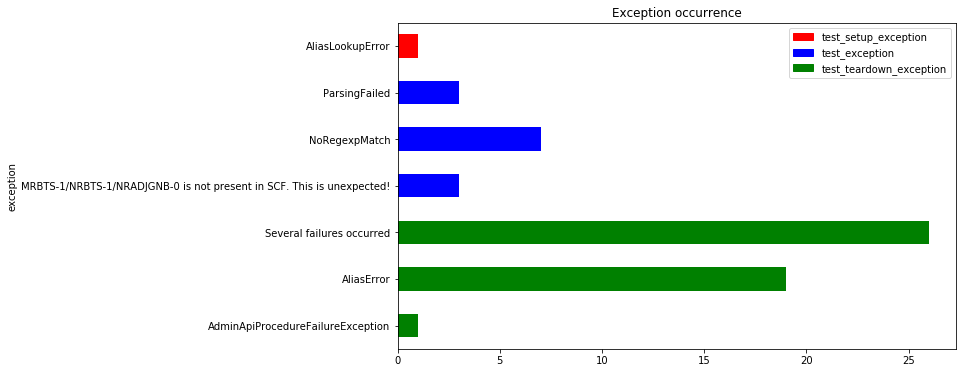

In [196]:
plot_runs_by_exception_types(df_na)

In [23]:
from robot.result.resultbuilder import ExecutionResult
from robot.result import ResultVisitor

In [5]:
results = ExecutionResult("./output.xml")

In [18]:
err = results.errors
stats = results.statistics
print(stats.total.failed)
print(stats.total.passed)

1
6


In [21]:
for elem in err.messages:
    print(elem)

2021/11/21 12:45:10 MibSibAcquisitionFailed exception occurred
Your current egate might not contain get_testline_info.sh. Please install the latest ute-wts package.
2021/11/21 13:03:34 MibSibAcquisitionFailed exception occurred
Your current egate might not contain get_testline_info.sh. Please install the latest ute-wts package.
2021/11/21 13:21:56 MibSibAcquisitionFailed exception occurred
Your current egate might not contain get_testline_info.sh. Please install the latest ute-wts package.
2021/11/21 13:40:19 MibSibAcquisitionFailed exception occurred
Your current egate might not contain get_testline_info.sh. Please install the latest ute-wts package.
Your current egate might not contain get_testline_info.sh. Please install the latest ute-wts package.
Your current egate might not contain get_testline_info.sh. Please install the latest ute-wts package.
Your current egate might not contain get_testline_info.sh. Please install the latest ute-wts package.
Your current egate might not conta

In [28]:
a = ResultVisitor().visit_errors(err)

In [29]:
a

In [15]:
vars(stats.total._stat)

{'name': 'All Tests',
 'passed': 6,
 'failed': 1,
 'skipped': 0,
 'elapsed': 10068106,
 '_norm_name': 'alltests'}